Visualising covid cases for states in India and training M/c for predicting the confirmed cases in maharashtra using Random Forest-linearregression

In [1]:
import pandas as pd

In [2]:
file = pd.read_csv("covid_19_india.csv",parse_dates =['Date'],dayfirst=True ) # parse_dates will convert object type to datetime

In [3]:
covid = pd.DataFrame(file)

In [4]:
covid.info()
covid

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       18110 non-null  int64         
 1   Date                      18110 non-null  datetime64[ns]
 2   Time                      18110 non-null  object        
 3   State/UnionTerritory      18110 non-null  object        
 4   ConfirmedIndianNational   18110 non-null  object        
 5   ConfirmedForeignNational  18110 non-null  object        
 6   Cured                     18110 non-null  int64         
 7   Deaths                    18110 non-null  int64         
 8   Confirmed                 18110 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.2+ MB


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [5]:
# taking only the necessary instance attributes and change the column names
cov = covid[['Date','State/UnionTerritory','Cured','Deaths','Confirmed']]
cov.columns = ['date','state','cured','deaths','confirmed']

In [6]:
#analyse records between specific dates
betday = cov.loc[(cov.date >= '2020-02-01') &  (cov.date <= '2020-02-08')] 
betday

,date,state,cured,deaths,confirmed
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
5,2020-02-04,Kerala,0,0,3
6,2020-02-05,Kerala,0,0,3
7,2020-02-06,Kerala,0,0,3
8,2020-02-07,Kerala,0,0,3
9,2020-02-08,Kerala,0,0,3


In [7]:
#analyse records on specific date
today = cov[cov.date == '2021-08-11']
today

,date,state,cured,deaths,confirmed
18074,2021-08-11,Andaman and Nicobar Islands,7412,129,7548
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182
18076,2021-08-11,Arunachal Pradesh,47821,248,50605
18077,2021-08-11,Assam,559684,5420,576149
18078,2021-08-11,Bihar,715352,9646,725279
18079,2021-08-11,Chandigarh,61150,811,61992
18080,2021-08-11,Chhattisgarh,988189,13544,1003356
18081,2021-08-11,Dadra and Nagar Haveli and Daman and Diu,10646,4,10654
18082,2021-08-11,Delhi,1411280,25068,1436852
18083,2021-08-11,Goa,167978,3164,172085


In [8]:
#state with max confirmed states on a specific date
top_confirmed_states = today.sort_values(by = 'confirmed',ascending = False)[0:5]
top_confirmed_states

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182


In [9]:
#state with max death states on a specific date
top_death_states = cov.sort_values(by = 'deaths',ascending = False).head()
top_death_states

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18058,2021-08-10,Maharashtra,6151956,134064,6357833
18022,2021-08-09,Maharashtra,6144388,133996,6353328
17986,2021-08-08,Maharashtra,6139493,133845,6347820
17950,2021-08-07,Maharashtra,6130137,133717,6341759


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

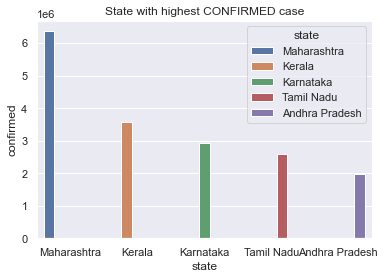

In [11]:
#visualize states with highest confirmed case on specific date
sns.set(rc = {'figure.figsize':(15,10)})
sns.barplot(x = 'state',y = 'confirmed',data = top_confirmed_states,hue = 'state')
plt.title("State with highest CONFIRMED case")
plt.show()

In [12]:
# records with highest confirmed case
highest_confirmed = cov.sort_values(by = 'confirmed',ascending = False)[1:500]
highest_confirmed

,date,state,cured,deaths,confirmed
18058,2021-08-10,Maharashtra,6151956,134064,6357833
18022,2021-08-09,Maharashtra,6144388,133996,6353328
17986,2021-08-08,Maharashtra,6139493,133845,6347820
17950,2021-08-07,Maharashtra,6130137,133717,6341759
17914,2021-08-06,Maharashtra,6124278,133530,6336220
...,...,...,...,...,...
17463,2021-07-25,Andhra Pradesh,1916914,13241,1952513
17427,2021-07-24,Andhra Pradesh,1914177,13223,1950339
10282,2021-01-06,Maharashtra,1850189,49759,1950171
17391,2021-07-23,Andhra Pradesh,1911812,13209,1948592


In [13]:
#understand the states with highest confirmed cases  
highest_confirmed['state'].unique()

array(['Maharashtra', 'Maharashtra***', 'Kerala', 'Karnataka',
       'Karanataka', 'Tamil Nadu', 'Andhra Pradesh'], dtype=object)

In [14]:
highest_confirmed['state'].unique()[0]# state with highest confirmed case
highest_confirmed['state'].unique()[2]# state with third highest confirmed case

'Kerala'

In [15]:
#analyse states with highest death case on specific date
top_death_states = today.sort_values(by = 'deaths',ascending = False)[0:5]
top_death_states

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18082,2021-08-11,Delhi,1411280,25068,1436852
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812


<Axes: xlabel='state', ylabel='deaths'>

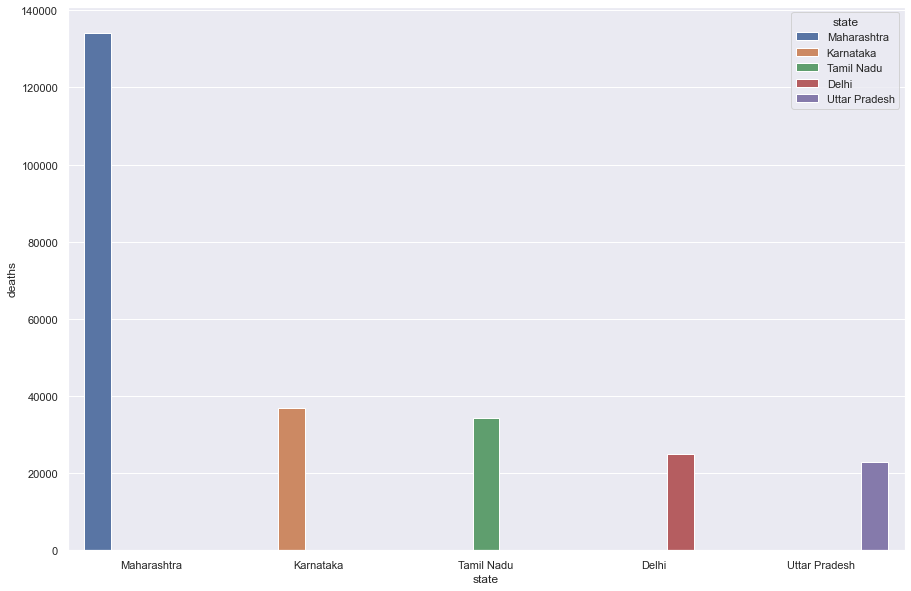

In [16]:
#visualize states with highest death case on specific date
sns.set(rc = {'figure.figsize' : (15,10)})
sns.barplot(x='state',y = 'deaths', data =top_death_states,hue='state')

In [17]:
# records of Maharasthra
maharashtra = cov[cov['state'] == 'Maharashtra']
maharashtra

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14
...,...,...,...,...,...
17950,2021-08-07,Maharashtra,6130137,133717,6341759
17986,2021-08-08,Maharashtra,6139493,133845,6347820
18022,2021-08-09,Maharashtra,6144388,133996,6353328
18058,2021-08-10,Maharashtra,6151956,134064,6357833


<Axes: xlabel='date', ylabel='confirmed'>

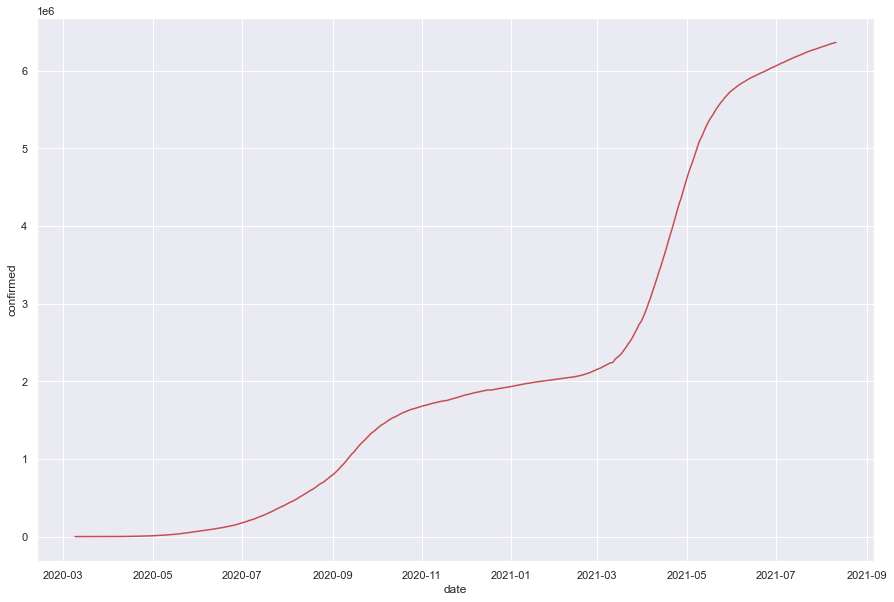

In [18]:
#visualize confirmed case in Maharashtra

sns.lineplot(x = 'date',y='confirmed',data = maharashtra,color = 'r')

Just for practice!Training the model

In [19]:
# train a model to predict the 'confirmed case' in Maharasthra based on the dates provided

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import datetime as dt

In [21]:
#converting dat to ordinal
maharashtra['date'] = maharashtra['date'].map(dt.datetime.toordinal)
maharashtra['date']

C:\Users\Subitha\AppData\Local\Temp\ipykernel_10472\3078659813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maharashtra['date'] = maharashtra['date'].map(dt.datetime.toordinal)


76       737493
91       737494
97       737495
120      737496
133      737497
          ...  
17950    738009
17986    738010
18022    738011
18058    738012
18094    738013
Name: date, Length: 520, dtype: int64

In [22]:
X = maharashtra['date']
y = maharashtra['confirmed']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [23]:
model = LinearRegression()

In [24]:
model.fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [29]:
y_pred = model.predict(np.array(X_test).reshape(-1,1))

In [30]:
from sklearn.metrics import mean_squared_error

In [33]:
mean_squared_error(np.array(y_test).reshape(-1,1),np.array(y_pred).reshape(-1,1))

627524334580.2172

In [34]:
maharashtra['date']

76       737493
91       737494
97       737495
120      737496
133      737497
          ...  
17950    738009
17986    738010
18022    738011
18058    738012
18094    738013
Name: date, Length: 520, dtype: int64

In [36]:
model.predict([[737493]])

array([[-1219390.03856277]])

-ve value is obtained .Hence model is not a good model.we should tune hyperparameter it to correct it!

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

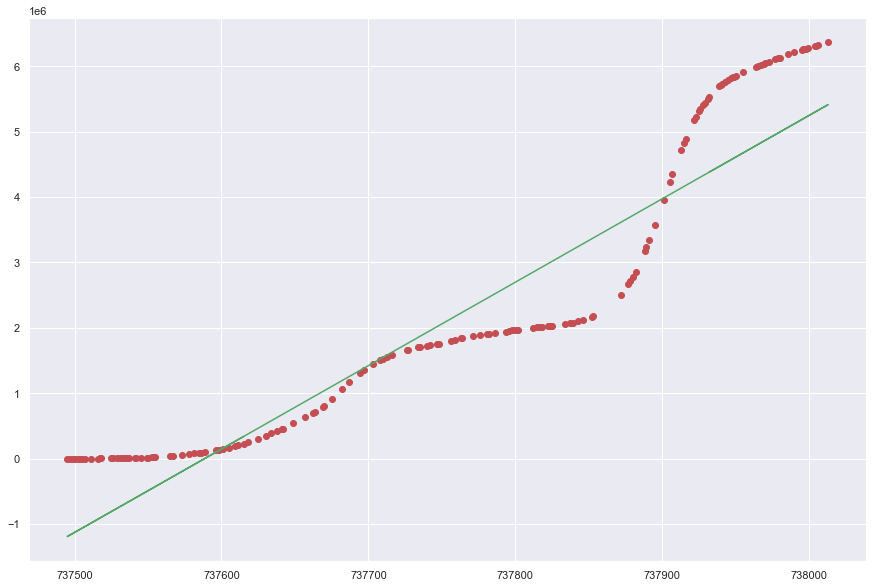

In [58]:
plt.scatter(X_test,y_test,c ='r')
plt.plot(X_test,y_pred,c ='g')
plt.show()

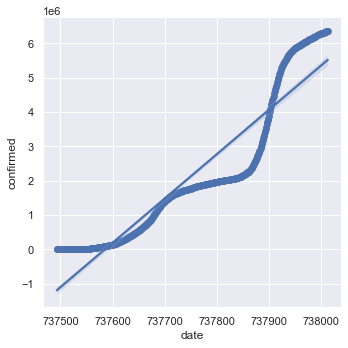

In [60]:
sns.lmplot(x = 'date',y = 'confirmed',data = maharashtra )